In [1]:
! pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 19.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 45.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp312-cp312-linux_x86_64.whl size=1029217 sha256=effff22fddc8252cded0dae573693ae61c1dd14a0d5b1459d6399b221e792c8d
  Stored in directory: /home/codespace/.cache/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


In [1]:
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get data from yahoo finance
sd = dt.datetime(2002,1,1)
ed = dt.datetime(2024,10,1)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ', sd, ed)
# 2x leveraged nasdaq 100 etf
qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD', sd, ed)
# 3x leveraged nasdaq 100 etf
tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ', sd, ed)
#nasdaq 100 index
ndx = ab.StockData('NDX')
ndx.get_data_from_yfinance('NDX', sd, ed)
#S&P 500 etf
spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY', sd, ed)

ffty = ab.StockData('FFTY')
ffty.get_data_from_yfinance('FFTY',sd,ed+dt.timedelta(days=1))

#nasdaq stocks above 200 day moving average percentage
naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv', sd, ed)

#mmth: tradingview stocks above 200 day moving average percentage
mmth = ab.StockData('MMTH')
mmth.get_data_from_csv('data/MMTH_index.csv', sd, ed)


GPU acceleration is NOT available


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:

#mmth.data = mmth.data.loc[(mmth.data.index>=sd)&(mmth.data.index<=ed)]
# df = pd.read_csv('data/MMTH.csv')
# df2 = df[['time','open','high','low', 'close']].copy()
# df2.columns =['Date', 'Open','High','Low', 'Close']
# df2.to_csv('data/MMTH_index.csv', index=False)

In [2]:
df = naa200r.data[['Close']].merge(mmth.data[['Close']], left_index=True, right_index=True)
df.columns = ['naa200r','mmth']
#df['naa200r_fitted1'] = df['mmth']*0.81+2.13
df['naa200r_fitted2'] = df['mmth']*0.85 # slightly lower than naa200r; parameter: 30/0.85 and 15/0.85 = 3
#df['naa200r_fitted3'] = df['mmth']*0.58+7


<Axes: title={'center': 'NAA200R VS MMTH VS FITTED_NAA200R'}, xlabel='Date'>

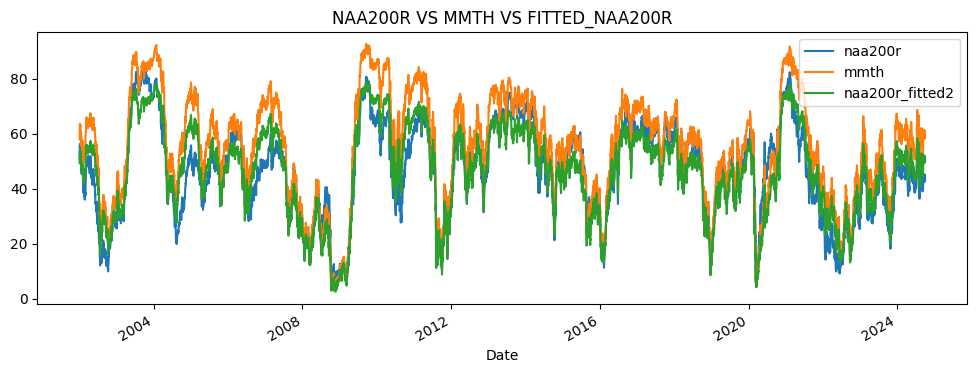

In [3]:
df.plot(figsize=(12,4), title='NAA200R VS MMTH VS FITTED_NAA200R')##

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#df_below40 = df.loc[df.naa200r<=40].copy() # we want to evaluate the performance for this important subset - not good fit

df['weight'] = np.linspace(1, 5, len(df))
# Features and target variable
X = df[['mmth']].values  # Predictor variable
y = df['naa200r'].values    # Target variable
weights = df['weight'].values


# Train-test split
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y, weights, test_size=0.2, random_state=42)

# Weighted linear regression model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train, sample_weight=w_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred, sample_weight=w_test)
r2 = r2_score(y_test, y_pred, sample_weight=w_test)

# Results
print(f"Weighted Mean Squared Error: {mse}")
print(f"Weighted R-squared: {r2}")
print("model coef and intercept", model.coef_, model.intercept_)

# Plot results
# plt.figure(figsize=(8, 6))
# # plt.scatter(X_test, y_test, color='blue', label='Actual values')
# # plt.scatter(X_test, y_pred, color='red', alpha=0.7, label='Predicted values')
# plt.xlabel('MMTH')
# plt.ylabel('NAA200R')
# plt.title('Linear Regression: NAA200R vs. MMTH')
# plt.legend()
# plt.show()


Weighted Mean Squared Error: 35.36502456143537
Weighted R-squared: 0.8595009883706998
model coef and intercept [0.85116812] 0.0


/workspaces/backtesting/Ab.py:769: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.balance['Signal'].fillna(0, inplace=True)
/workspaces/backtesting/Ab.py:790: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.012115365879945553' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.balance.loc[i[0], 'Stock'] = p_stock + p_cash / c_price
/workspaces/backtesting/Ab.py:724: FutureWarning: Setting an item of


<Ab.StockData object at 0x7796c03b6360>:
cumulative return      : -12.47%
compound anual return  : -4.3413%
max_drawdown           : -81.02%
sharp_ratio            : 1.86%
average of daily return: 0.0843%
std of daily return    : 4.5431%
number of trades       : 2,
trading days           : 1001,
batting Average        : 0.00%
Gain Average           : nan%
Loss Average           : -12.47%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        


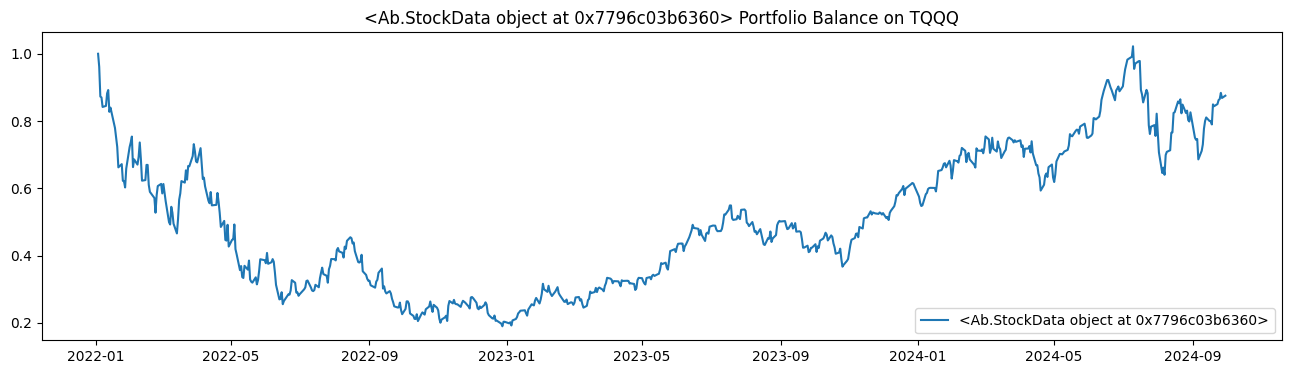

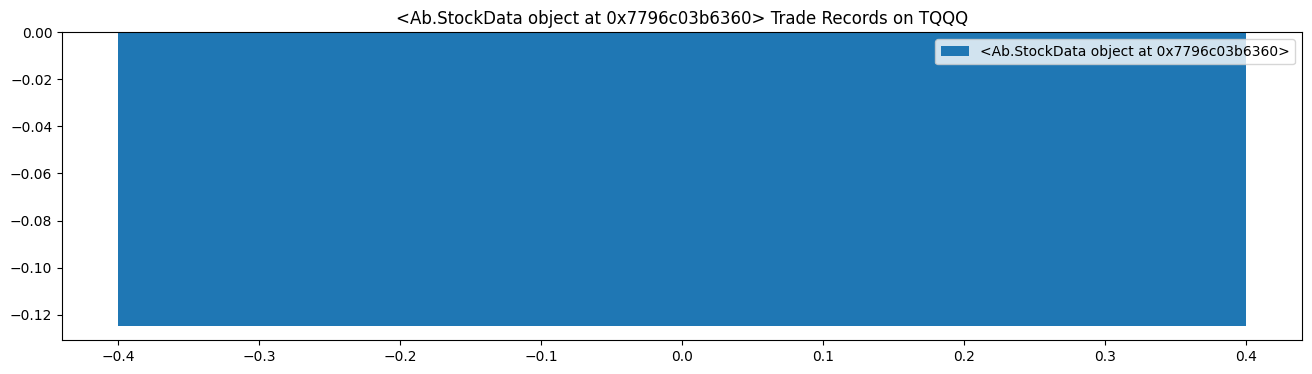

In [2]:
ticker = tqqq
test_start = dt.datetime(2022,1,1)
test_end = dt.datetime(2024,10,1)
# plot_start = dt.datetime(2020,3,14)
# plot_end = dt.datetime(2024,7,1)
plot_start , plot_end = test_start, test_end

#buy and hold

bah = ab.BuyAndHold(ticker)
bah.run_strategy(ticker,test_start,test_end)
bah.trades


bah_bt = ab.BackTest()

bah_bt.run_backtest(bah,ticker,test_start,test_end)


bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()

In [3]:
stg = ab.Threshold('NAA200R', stop_loss=-0.15)
stg.run_strategy(naa200r, start_date=test_start, end_date=test_end)
naa200r_bt_daily = ab.BackTest()
naa200r_bt_daily.run_backtest(stg, ticker, test_start,test_end)
naa200r_bt_daily.performance_summary()
naa200r_bt_daily.plot_balance()

/workspaces/backtesting/Ab.py:297: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.joined_data[ma_str].fillna(method='bfill', inplace=True)
/workspaces/backtesting/Ab.py:297: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.joined_data[ma_str].fillna(method='bfill', inplace=True)


TypeError: unhashable type: 'Series'

Index(['Day', 'Open', 'High', 'Low', 'NAA200R', 'Volume', 'MA20', 'Signal'], dtype='object')
Index(['TQQQ', 'Weekday', 'Signal_x', 'BSignal', 'SSignal', 'Cash', 'Stock',
       'Total', 'Margin', 'Trade', 'Buy Price', 'Profit', 'Day', 'Open',
       'High', 'Low', 'NAA200R', 'Volume', 'MA20', 'Signal_y'],
      dtype='object')


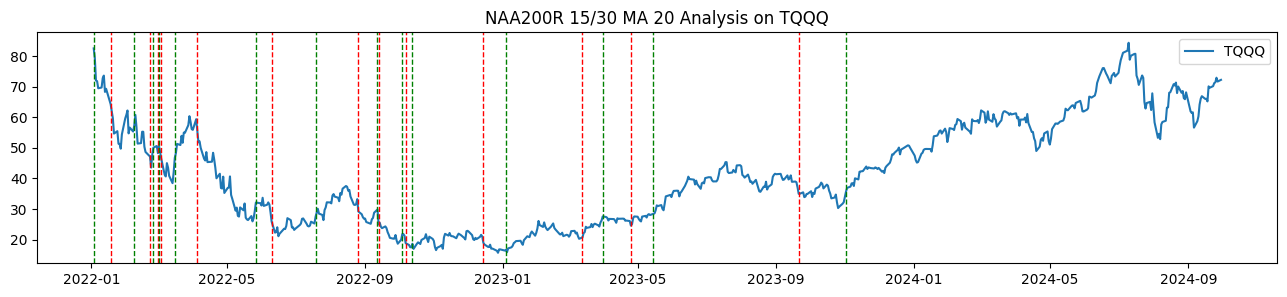

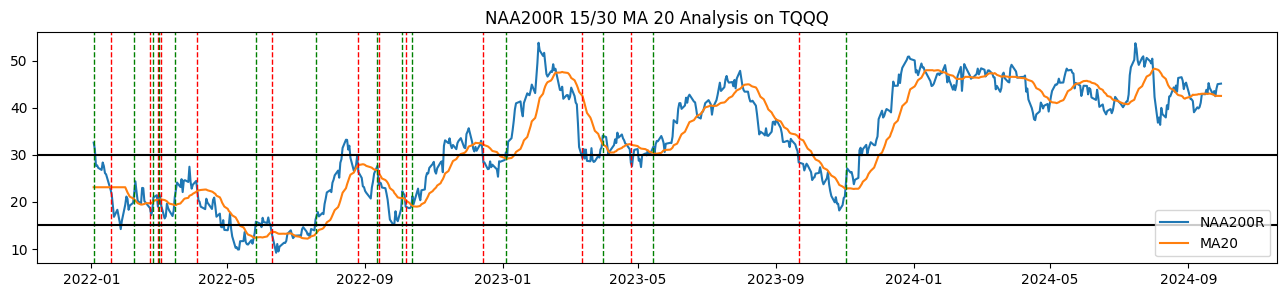

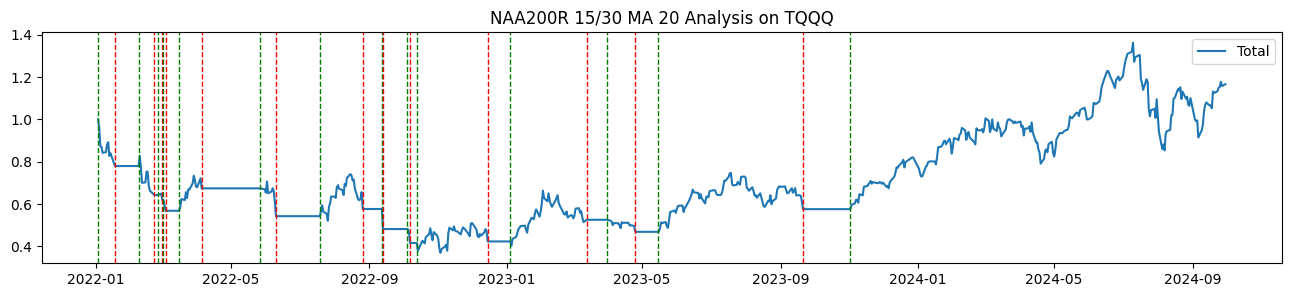

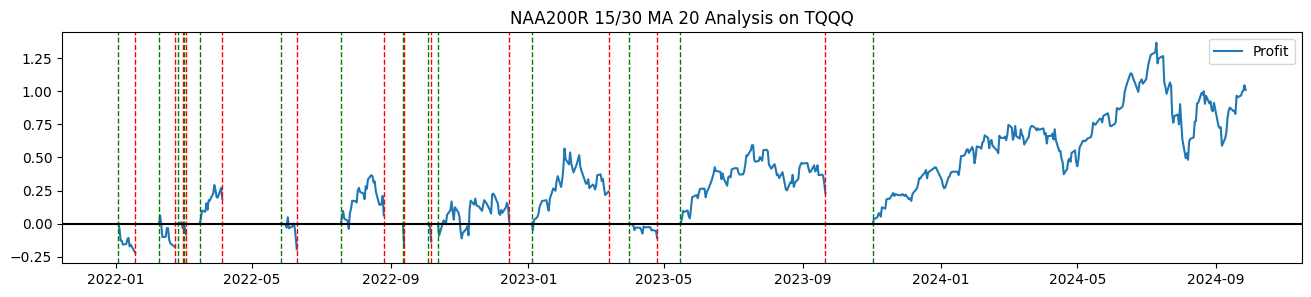

In [19]:
print(stg.joined_data.columns)
print(naa200r_bt_daily.joined_data.columns)

naa200r_bt_daily.plot_joined_data([ticker.ticker], plot_start, plot_end)
naa200r_bt_daily.plot_joined_data(['NAA200R','MA20'], plot_start, plot_end, ydash_low=15, ydash_high=30)
naa200r_bt_daily.plot_joined_data(['Total'], plot_start, plot_end)
naa200r_bt_daily.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)

/workspaces/backtesting/Ab.py:294: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.joined_data[ma_str].fillna(method='bfill', inplace=True)
/workspaces/backtesting/Ab.py:294: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.joined_data[ma_str].fillna(method='bfill', inplace=True)
/workspaces/backtesting/Ab.py:745: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace 


MMTH 15/30 MA 20:
cumulative return      : 4.87%
compound anual return  : 1.5966%
max_drawdown           : -73.44%
sharp_ratio            : 2.02%
average of daily return: 0.0740%
std of daily return    : 3.6680%
number of trades       : 18,
trading days           : 1001,
batting Average        : 23.53%
Gain Average           : 59.82%
Loss Average           : -11.81%
Risk Reward Ratio      : 5.06
Gain STD               : 50.10%
Loss STD               : 7.05%
        
Index(['Open', 'High', 'Low', 'MMTH', 'MA20', 'Signal'], dtype='object')
Index(['TQQQ', 'Weekday', 'Signal_x', 'BSignal', 'SSignal', 'Cash', 'Stock',
       'Total', 'Margin', 'Trade', 'Buy Price', 'Profit', 'Open', 'High',
       'Low', 'MMTH', 'MA20', 'Signal_y'],
      dtype='object')


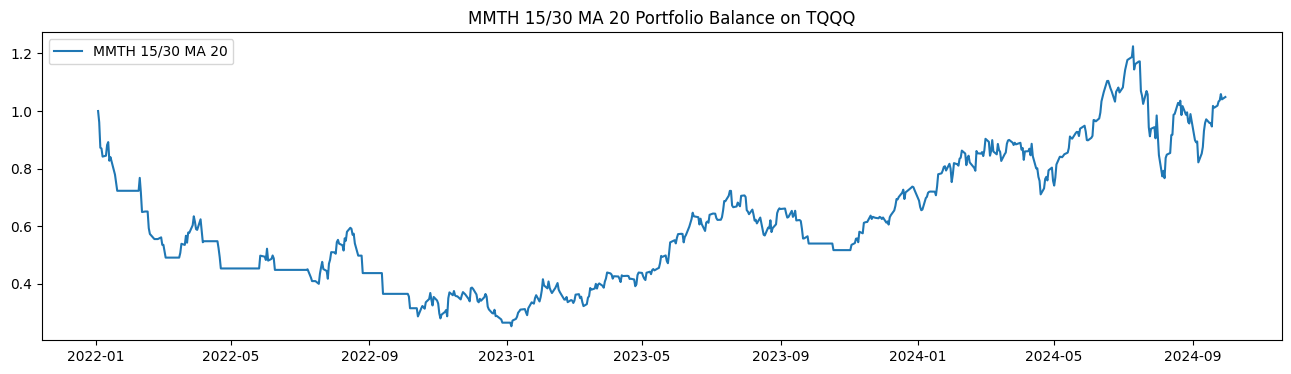

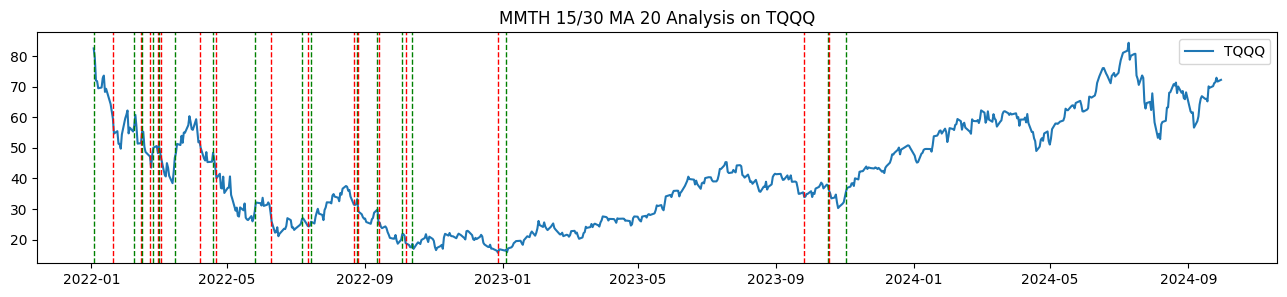

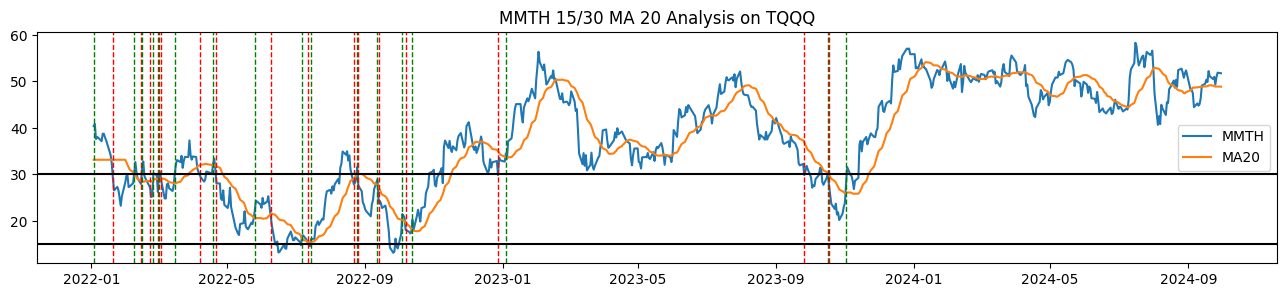

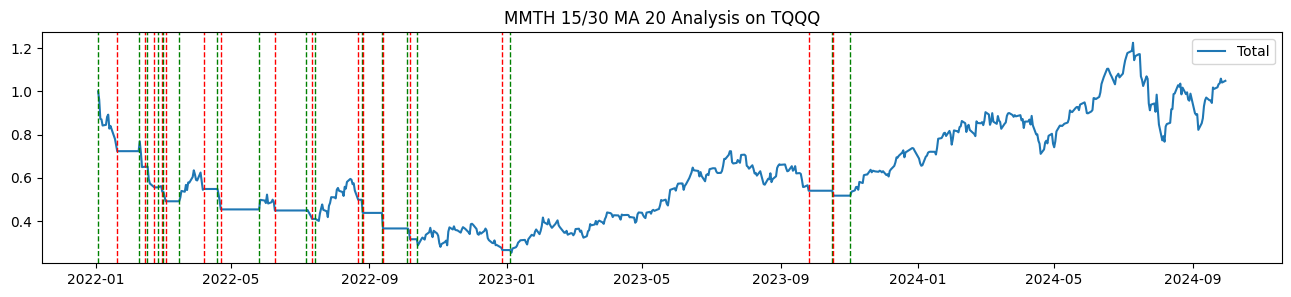

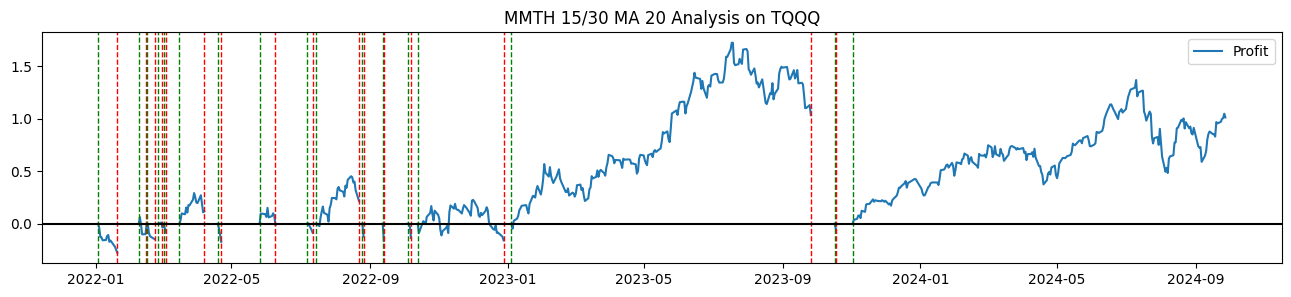

In [180]:
stg = ab.Threshold('MMTH',buy_threshold=15, sell_threshold=30)
stg.run_strategy(mmth, start_date=test_start, end_date=test_end)
mmth_bt_daily = ab.BackTest()
mmth_bt_daily.run_backtest(stg, ticker, test_start,test_end)
mmth_bt_daily.performance_summary()
mmth_bt_daily.plot_balance()

print(stg.joined_data.columns)
print(mmth_bt_daily.joined_data.columns)
mmth_bt_daily.plot_joined_data([ticker.ticker], plot_start, plot_end)
mmth_bt_daily.plot_joined_data(['MMTH','MA20'], plot_start, plot_end, ydash_low=15, ydash_high=30)
mmth_bt_daily.plot_joined_data(['Total'], plot_start, plot_end)
mmth_bt_daily.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)

/workspaces/backtesting/Ab.py:745: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.balance['Signal'].fillna(0, inplace=True)
/workspaces/backtesting/Ab.py:766: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.012115366999804134' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.balance.loc[i[0], 'Stock'] = p_stock + p_cash / c_price
/workspaces/backtesting/Ab.py:700: FutureWarning: Setting an item of


SMA21 1.02/0.98 MA 21:
cumulative return      : 19.53%
compound anual return  : 6.1283%
max_drawdown           : -48.66%
sharp_ratio            : 2.35%
average of daily return: 0.0687%
std of daily return    : 2.9245%
number of trades       : 15,
trading days           : 1001,
batting Average        : 42.86%
Gain Average           : 26.03%
Loss Average           : -13.01%
Risk Reward Ratio      : 2.00
Gain STD               : 23.60%
Loss STD               : 4.91%
        


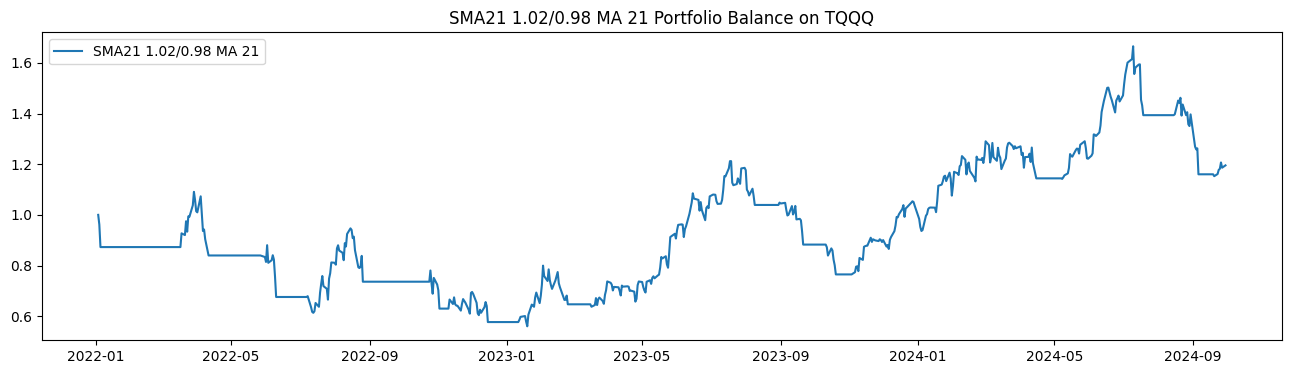

In [181]:
indicator = qqq
macross_strategy = ab.MAThreshold('SMA21', ma_window = 21, buy_threshold = 1.02, sell_threshold = 0.98)
macross_strategy.run_strategy(indicator, test_start ,test_end)
ma_cross_bt = ab.BackTest()
ma_cross_bt.run_backtest(macross_strategy, ticker,test_start, test_end, weekly_buy=False, weekly_sell=False)
ma_cross_bt.performance_summary()
ma_cross_bt.plot_balance()

Index(['Open', 'High', 'Low', 'MMTH', 'MA20', 'Signal'], dtype='object')
Index(['TQQQ', 'Weekday_x', 'Signal_x', 'BSignal', 'SSignal', 'Cash', 'Stock',
       'Total', 'Margin', 'Trade', 'Buy Price', 'Profit', 'Close', 'High',
       'Low', 'Open', 'Volume', 'Weekday_y', 'MA21', 'MA20', 'price_to_MA20',
       'MA22', 'price_to_MA22', 'price_to_MA', 'Signal_y'],
      dtype='object', name='Price')


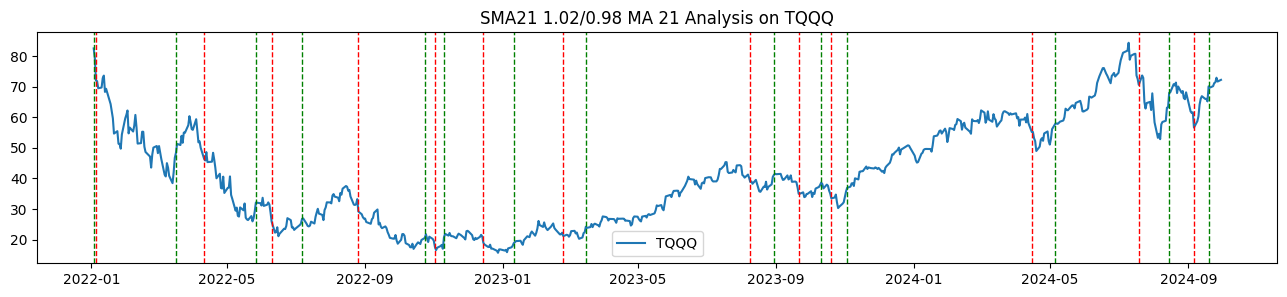

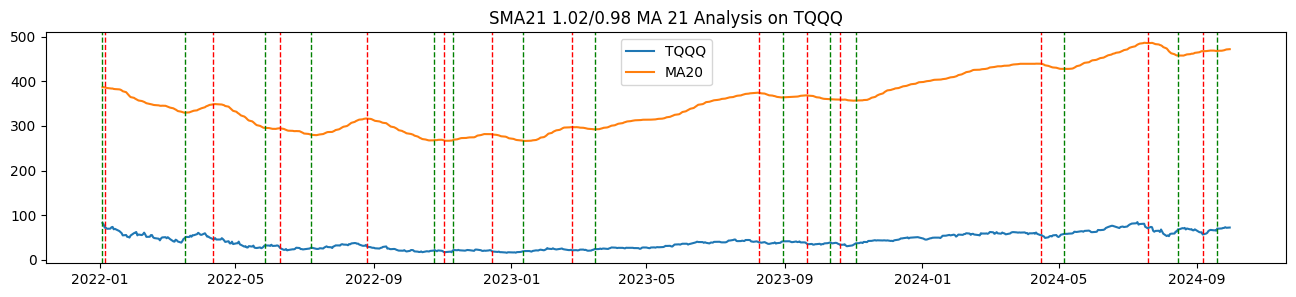

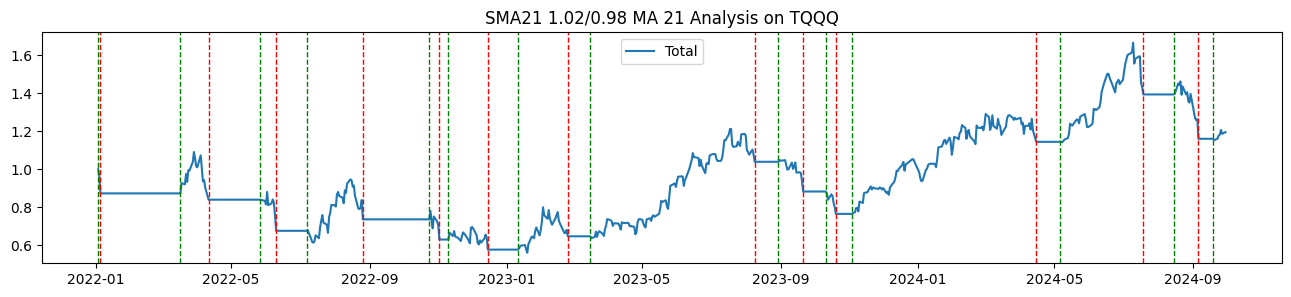

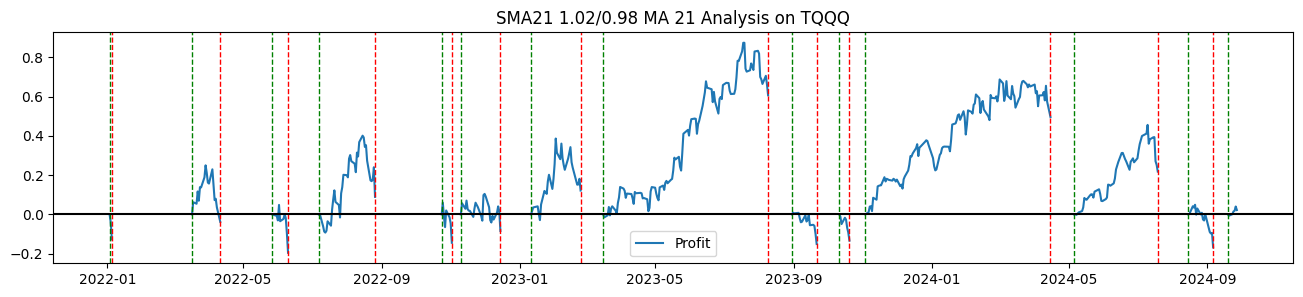

In [182]:
print(stg.joined_data.columns)
print(ma_cross_bt.joined_data.columns)

ma_cross_bt.plot_joined_data([ticker.ticker], plot_start, plot_end)
ma_cross_bt.plot_joined_data(['TQQQ','MA20'], plot_start, plot_end)
ma_cross_bt.plot_joined_data(['Total'], plot_start, plot_end)
ma_cross_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)

<Axes: xlabel='Date'>

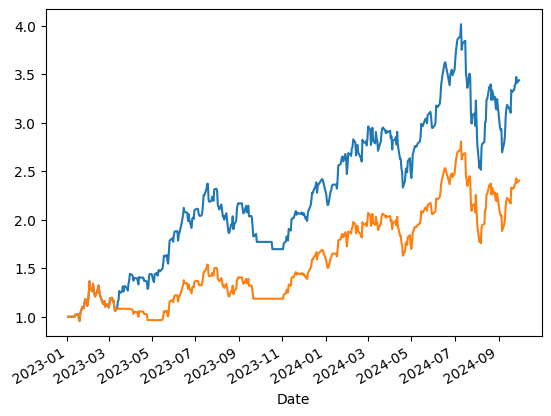

In [170]:
mmth_bt_daily.balance['Total'].plot()
naa200r_bt_daily.balance['Total'].plot()

In [175]:
## stop loss: if qqq drops by 20%, get out etc
qqq_data

Price,Close,High,Low,Open,Volume
Date,,,,,
2002-01-02,34.049706,34.083663,33.047994,33.591294,61708800
2002-01-03,35.229710,35.272154,34.177061,34.219509,85769100
2002-01-04,35.374016,35.900341,34.745825,35.611712,86876900
2002-01-07,34.983501,35.840900,34.049704,35.747520,75166200
2002-01-08,35.221214,35.458908,34.669422,34.890137,66956800
...,...,...,...,...,...
2024-09-24,484.588593,485.547038,479.396982,483.680054,25952600
2024-09-25,485.037872,487.004702,483.779891,483.959594,26549900
2024-09-26,488.682007,492.905208,485.017902,492.575722,32020200


In [176]:
## calculate qqq dropdown
import yfinance as yf
import pandas as pd

# Download QQQ historical data
qqq_data = yf.download("QQQ", start="2002-01-01", end="2024-10-01", progress=False).droplevel(axis=1, level=1)

# Add rolling peak column
qqq_data['rolling_peak'] = qqq_data['Close'].cummax()

# Calculate percentage drop from the peak
qqq_data['pct_drop'] = (qqq_data['Close'] / qqq_data['rolling_peak'] - 1) * 100

# Find intervals where the cumulative drop reaches or exceeds -20%
intervals = []
in_drop = False  # To track if we're within a drop interval
start_date = None

for date, row in qqq_data.iterrows():
    if row['pct_drop'] <= -20 and not in_drop:
        # Start of a new drop interval
        in_drop = True
        start_date = date
    elif row['pct_drop'] > -20 and in_drop:
        # End of a drop interval
        in_drop = False
        end_date = date
        intervals.append((start_date, end_date))

# If we end in a drop, close the last interval
if in_drop:
    intervals.append((start_date, qqq_data.index[-1]))

# Display results
print("Date Intervals with Cumulative Drops of 20% or More:")
for start, end in intervals:
    print(f"From {start.date()} to {end.date()}")

# Optional: Save intervals to a file
# intervals_df = pd.DataFrame(intervals, columns=["Start Date", "End Date"])
# intervals_df.to_csv("qqq_20_percent_drop_intervals.csv", index=False)


Date Intervals with Cumulative Drops of 20% or More:
From 2002-04-11 to 2002-04-12
From 2002-04-23 to 2003-08-29
From 2003-09-10 to 2003-09-11
From 2003-09-24 to 2003-10-03
From 2004-08-06 to 2004-08-18
From 2008-02-05 to 2008-02-11
From 2008-02-12 to 2008-02-13
From 2008-02-14 to 2008-02-26
From 2008-02-29 to 2008-03-24
From 2008-03-27 to 2008-04-01
From 2008-09-04 to 2009-11-11
From 2009-11-12 to 2009-11-13
From 2009-11-20 to 2009-11-23
From 2009-11-27 to 2009-12-01
From 2009-12-08 to 2009-12-09
From 2010-01-28 to 2010-02-02
From 2010-02-04 to 2010-02-11
From 2010-06-30 to 2010-07-07
From 2018-12-21 to 2018-12-26
From 2020-03-12 to 2020-03-13
From 2020-03-16 to 2020-03-26
From 2020-03-27 to 2020-03-30
From 2020-04-01 to 2020-04-06
From 2022-03-14 to 2022-03-15
From 2022-04-26 to 2022-04-28
From 2022-04-29 to 2022-05-04
From 2022-05-05 to 2022-08-03
From 2022-08-05 to 2022-08-10
From 2022-08-22 to 2023-03-31
From 2023-04-04 to 2023-04-27
From 2023-05-02 to 2023-05-05


In [186]:
df_stoploss = naa200r_bt_daily.balance.copy()

In [190]:
df_stoploss['Profit_stoploss']=np.where(df_stoploss['Profit']<=-0.08, -0.08, df_stoploss['Profit'])

<Axes: xlabel='Date'>

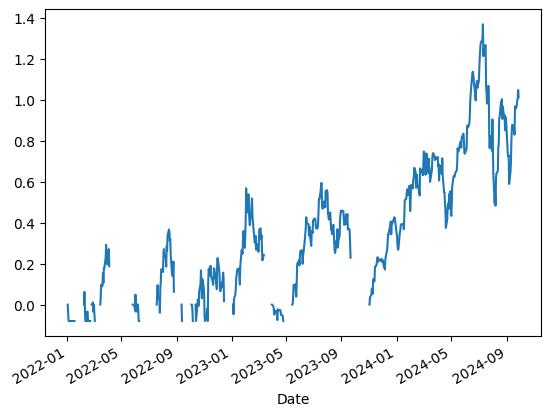

In [192]:
df_stoploss['Profit_stoploss'].plot()

In [15]:
trade_records = naa200r_bt_daily.trade_records.copy()

trade_records

,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %,HoldingDays,LongTermProfit,ShortTermProfit,TaxCollectYear,TaxCollected
0,2022-01-03,2022-01-05 00:00:00,TQQQ,0.012115,82.539818,71.399123,-0.134974,-0.134974,2.0,0.0,0.000000,2023.0,0.0
1,2022-01-06,2022-01-18 00:00:00,TQQQ,0.012042,71.837067,62.396102,-0.113683,-0.131422,12.0,0.0,0.000000,2023.0,0.0
2,2022-02-08,2022-02-10 00:00:00,TQQQ,0.013130,57.222717,54.695345,-0.033185,-0.044167,2.0,0.0,0.000000,2023.0,0.0
3,2022-02-14,2022-02-17 00:00:00,TQQQ,0.013934,51.540955,49.738036,-0.025121,-0.034980,3.0,0.0,0.000000,2023.0,0.0
4,2022-02-18,2022-02-22 00:00:00,TQQQ,0.014243,48.656670,47.151825,-0.021434,-0.030928,4.0,0.0,0.000000,2023.0,0.0
5,2022-02-25,2022-03-01 00:00:00,TQQQ,0.013412,50.074696,45.544723,-0.060756,-0.090464,4.0,0.0,0.000000,2023.0,0.0
6,2022-03-02,2022-03-04 00:00:00,TQQQ,0.012078,50.576309,43.617364,-0.084048,-0.137593,2.0,0.0,0.000000,2023.0,0.0
7,2022-03-16,2022-03-23 00:00:00,TQQQ,0.011274,46.727379,48.539946,0.020435,0.038790,7.0,0.0,0.020435,2023.0,0.0
8,2022-03-24,2022-03-30 00:00:00,TQQQ,0.009949,55.004021,54.322026,-0.006785,-0.012399,6.0,0.0,0.000000,2023.0,0.0
9,2022-03-31,2022-04-05 00:00:00,TQQQ,0.009630,56.123013,53.436480,-0.025871,-0.047869,5.0,0.0,0.000000,2023.0,0.0


In [ ]:
for i, row in qqq_data.iterrows():
    current_date = row['Date']
    current_price = row['Adj Close']

    # Check for active buy position
    if last_buy_price is not None:
        # Calculate the stop-loss price
        stop_loss_price = last_buy_price * (1 - stop_loss_percent)
        if current_price <= stop_loss_price:
            # Trigger stop-loss sell
            positions.append({"Date": current_date, "Type": "Sell", "Price": current_price})
            last_buy_price = None  # Reset last buy price (waiting for next buy signal)

    # Buy signal check (depends on your logic, e.g., external signal or condition)
    buy_signal = False  # Replace with your actual buy signal logic
    if buy_signal and last_buy_price is None:
        # Execute buy
        positions.append({"Date": current_date, "Type": "Buy", "Price": current_price})
        last_buy_price = current_price